# Introduction to Data Science

Before you hand this problem in, make sure everything runs as expected. You should **restart the kernel and run all cells** by selecting 

`Kernel --> Restart Kernel and Run All Cells`

in the menubar.

- Of course, you should use **an appropriate kernel** on the Jupyterhub of the math department or locally, so that the right modules are used and the calculations can be checked deterministically.  
- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".
- Rename this problem sheet as follows:

      ps{number of lab}_{your user name}_problem{number of problem sheet in this lab}
    
  for example
    
      ps02_blja_problem1
    
- Please fill out the cell below for **every submission**.

**Change in submission of files**: Please upload this submission until next Tuesday to your shared Nextcloud [https://tuc.cloud/](https://tuc.cloud/) directory with the name of your username which has been created during the third exercise lab.
If you have not yet been assigned to a shared Nextcloud folder, please contact me via email (jan.blechschmidt@mathematik.tu-chemnitz.de) as soon as possible.

In [2]:
NAME = "Tanay Maurya"
EMAIL = "tanay.maurya@s2024.tu-chemnitz.de"
USERNAME = "tanay@tu-chemnitz.de"

---

## Lab 3: Regression

The previous exercises gave an introduction to Python, Numpy and Pandas. Beginning with this exercise, we shift our focus to statistical learning itself. To this end, we will employ the module scikit-learn which offers many functions we will cover over the remaining semester.

### Part A: Linear regression for the Advertising dataset

If not already done, please download the file [Advertising.csv](https://www.tu-chemnitz.de/mathematik/numa/lehre/ds-2019/Exercises/ps3/Advertising.csv) and move it into the current directory.

**Task**: Import the *Advertising* dataset as `adv` using the `pandas.read_csv` function. Ensure, that the first column is treated as the index column.

In [3]:
import pandas as pd
import numpy as np

# YOUR CODE HERE
adv = pd.read_csv("Advertising.csv", index_col=0)

# Print first entries of adv
print(adv.head())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


For convenience, we extract the values from this `pandas`-DataFrame.
This can be done with the method `to_numpy()`, which returns a `numpy` array.

**Task**: Extract the data in the following manner:
- `X` is of shape `(200, 3)` and contains all predictor variables, i.e., the values from the columns `TV`, `Radio` and `Newspaper`.
- `Y` is of shape `(200,)` and contains the dependent variable `Sales`

In [7]:
# YOUR CODE HERE
X = adv[['TV','radio','newspaper']].to_numpy()
Y = adv[['sales']].to_numpy().squeeze()

Note that the variables `X` and `Y` contain only the values itself, and no further information like the column title.

Using the `numpy` function `hsplit`, we can split an array horizontally.
This will become handy in many circumstances.
Here, we split the 2-dimensional numpy array `X` into three 
**2**-dimensional slices `tv`, `radio` and `news`.
Note that the returned arrays have still the second dimension (which is one)!

In [8]:
tv, radio, news = np.hsplit(X,3)

Compute for each of the 3 predictor variables **TV**, **radio** and **newspaper** simple (1-dimensional) linear regressions, e.g.

$$ y^{TV}_i \approx \beta_0^{TV} + \beta_1^{TV} \, x_i^{TV}$$

Use the following function:

    from sklearn.linear_model import LinearRegression
    
Store the intercepts, i.e., the values $\beta_0$ in variables
       
    intercept_tv, intercept_radio and intercept_news
    
and the linear coefficients, i.e., the values $\beta_1$ in variables

    lincoef_tv, lincoef_radio and lincoef_news

To print your results in a nice fashion, you can use a command similar to this f-string

    print(f'y = {intercept_tv} + {lincoef_tv} x TV'))

or alternatively by

    print('y = %5.4f + %5.4f x TV' % (intercept, lincoef))

In [19]:
from sklearn.linear_model import LinearRegression

# YOUR CODE HERE


#TV
model_tv = LinearRegression()
model_tv.fit(tv,Y)
intercept_tv = model_tv.intercept_
lincoef_tv = model_tv.coef_

#Radio
model_radio = LinearRegression()
model_radio.fit(radio,Y)
intercept_radio = model_radio.intercept_
lincoef_radio = model_radio.coef_

#newspaper
model_news = LinearRegression()
model_news.fit(news,Y)
intercept_news = model_news.intercept_
lincoef_news = model_news.coef_

print(f'y = {intercept_tv:5.4} + {model_tv.coef_[0]:5.4} x TV')
print(f'y = {intercept_radio:5.4} + {model_radio.coef_[0]:5.4} x Radio')
print(f'y = {intercept_news:5.4} + {model_news.coef_[0]:5.4} x News')

y = 7.033 + 0.04754 x TV
y = 9.312 + 0.2025 x Radio
y = 12.35 + 0.05469 x News


You should observe, that the regression coefficients for **TV** and **newspaper** are very similar.
As you already know from the lecture, it is not satisfying from a mathematical point of view to restrict our investigation to the absolute values of the coefficients.


### Part B: Assessing the quality of a linear fit.

In the lecture you learned about different measures for assessing the quality of a linear fit.
In the last exercise, we already implemented a function to compute the mean squared error (MSE).

This time, we want to compare the $R^2$ scores. You can use the method `score()` of a `LinearRegression` to get the $R^2$ values.
Remember that this value is the proportion of variability in $Y$ explained using **TV**, **radio** or **newspaper** as predictor in a 1-dimensional linear regression fit.

**Task**: Compute the $R^2$ scores and store them in variables
    
    R2_tv, R2_radio, R2_news

In [20]:
# YOUR CODE HERE
R2_tv = model_tv.score(tv, Y)
R2_radio = model_radio.score(radio, Y)
R2_news = model_news.score(news, Y)

print("R^2 for TV:        ", R2_tv)
print("R^2 for radio:     ", R2_radio)
print("R^2 for newspaper: ", R2_news)

R^2 for TV:         0.611875050850071
R^2 for radio:      0.33203245544529525
R^2 for newspaper:  0.05212044544430516


### Part C: Predicting values

Now we want to compute the predicted value of sales if we restrict our prediction to one input, i.e. **TV**, **radio** or **newspaper**, respectively.
Predict the values $\hat{y}^{TV}$, $\hat{y}^{radio}$ and $\hat{y}^{newspaper}$ using the `LinearRegression`-method `predict()` and store them in variables

    y_tv, y_radio, y_news

In [21]:
# YOUR CODE HERE
y_tv = model_tv.predict(tv)
y_radio = model_radio.predict(radio)
y_news = model_news.predict(news)

### Part D: Plotting
Plot the datapoints as well as the corresponding regression line for each of the inputs  **TV**, **radio** or **newspaper**.

You can use the functions `subplots` or `fig.add_subplot` to arrange the plots in one figure.

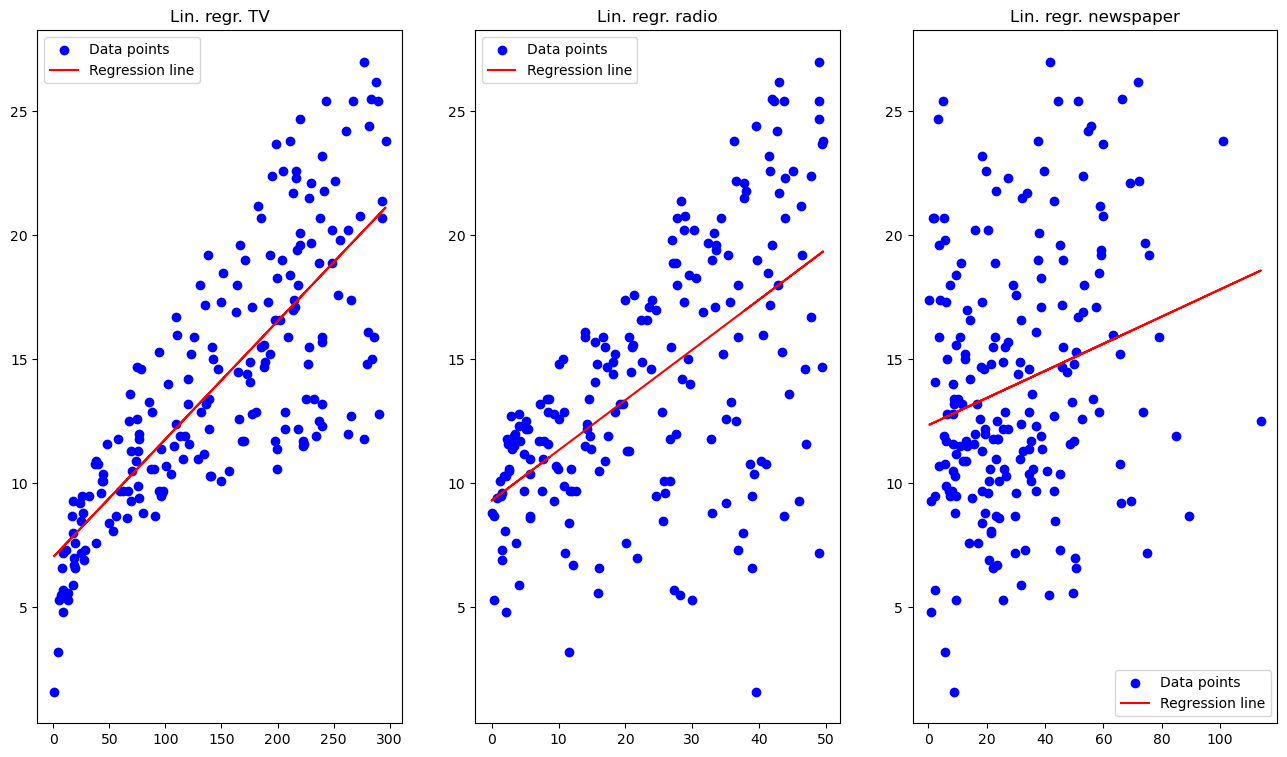

In [22]:
# We plot our findings using subplots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)

fig = plt.figure()
fig.add_subplot(1,3,1)

# YOUR CODE HERE
plt.scatter(tv, Y, color='blue', label='Data points')
plt.plot(tv, y_tv, color='red', label='Regression line')
plt.legend()
plt.title('Lin. regr. TV')

fig.add_subplot(1,3,2)

# YOUR CODE HERE
plt.scatter(radio, Y, color='blue', label='Data points')
plt.plot(radio, y_radio, color='red', label='Regression line')
plt.legend()
plt.title('Lin. regr. radio')

fig.add_subplot(1,3,3)

# YOUR CODE HERE
plt.scatter(news, Y, color='blue', label='Data points')
plt.plot(news, y_news, color='red', label='Regression line')
plt.legend()
plt.title('Lin. regr. newspaper');

### Part E: Statistical functions

Take a closer look at the correlation matrix for the `DataFrame` `adv`.
You can use the method `corr()` that is implemented for pandas 
`DataFrames`.
Which features are correlated most strongly?

In [23]:
adv.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Name the two **features**, that are correlated most strongly in the next cell!

YOUR ANSWER HERE: 
Radio and Newspaper

Investigate the statistical significance of the medium **newspaper** in a linear regression involving only this feature. Use a **t-test** for this purpose as described in the lecture notes or in the book *An Introduction to Statistical Learning*.

You should observe the following values:

|Coefficient | Estimate | SE | t-statistic | p-value|
|:-----------|----------|----|-------------|--------|
| $\beta_0$  | 12.351 | 0.621 | 19.88 | < 0.0001 |
| $\beta_{newspaper}$ | 0.055 | 0.017 | 3.30 | 0.00115


You should use `scipy` to get the $t$-distribution using

    from scipy.stats import t
    
The cumulative distribution function at a point `x` for `n` degrees of freedom can than be called by

    t.cdf(x, n)

In [25]:
# Import the t-distribution from scipy
from scipy.stats import t

# YOUR CODE HERE
n = len(Y)
beta_0 = model_news.intercept_
beta_1 = model_news.coef_

noise = Y - y_news
sum_squared_x_dev = np.sum((news - news.mean()) ** 2)
sigma_squared = np.sum(noise ** 2) / (n - 2)

SE_beta_0_squared = sigma_squared * (1 / n + news.mean() ** 2 / sum_squared_x_dev)
SE0 = np.sqrt(SE_beta_0_squared)
SE1 = np.sqrt(sigma_squared / sum_squared_x_dev)
tstat_0 = (beta_0-0)/SE0
tstat_1 = (beta_1-0)/SE1
pval_0 = 2 * (1 - t.cdf(tstat_0, n-2))
pval_1 = 2 * (1 - t.cdf(tstat_1, n-2))
# Print information
print("Intercept: %7.4f" % beta_0)
print("Lin. coef: %7.4f" % beta_1)
print("")
print("std-error Intercept: %7.4f" %  SE0)
print("std-error Lin. coef: %7.4f" % SE1)
print("")
print("t-statistic Intercept: %6.2f" % tstat_0)
print("t-statistic Lin. coef: %6.2f" % tstat_1)
print("")
print("P-value Intercept: %7.5f" % pval_0)
print("P-value Lin. coef: %7.5f" % pval_1)

Intercept: 12.3514
Lin. coef:  0.0547

std-error Intercept:  0.6214
std-error Lin. coef:  0.0166

t-statistic Intercept:  19.88
t-statistic Lin. coef:   3.30

P-value Intercept: 0.00000
P-value Lin. coef: 0.00115


C:\Users\Shobhit Maurya\AppData\Local\Temp\ipykernel_26572\3920967631.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Lin. coef: %7.4f" % beta_1)
C:\Users\Shobhit Maurya\AppData\Local\Temp\ipykernel_26572\3920967631.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("t-statistic Lin. coef: %6.2f" % tstat_1)
C:\Users\Shobhit Maurya\AppData\Local\Temp\ipykernel_26572\3920967631.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("P-value Li

### Part F: Linear regression on all predictors

Now construct a linear regression on all three predictor variables, i.e.

$$y_i ≈ \beta_0 + \beta_{TV} x^{TV}_i + \beta_{radio} x^{radio}_i + \beta_{newspaper} x^{newspaper}_i$$

Ensure that the intercept and linear regression coefficients are stored in the variables

    beta_0, beta_tv, beta_radio and beta_news

In [26]:
# YOUR CODE HERE
beta_tv = model_tv.coef_
beta_radio = model_radio.coef_
beta_news = beta_1
print('y = %5.4f + %5.4f x TV + %5.4f x radio + %5.4f x newspaper' % (beta_0, beta_tv, beta_radio, beta_news))

y = 12.3514 + 0.0475 x TV + 0.2025 x radio + 0.0547 x newspaper


C:\Users\Shobhit Maurya\AppData\Local\Temp\ipykernel_26572\54923334.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('y = %5.4f + %5.4f x TV + %5.4f x radio + %5.4f x newspaper' % (beta_0, beta_tv, beta_radio, beta_news))


What portion of the variance (between 0 and 1) is explained by this linear regression fit? Store your answer in the variable `explained_var`.

In [27]:
# YOUR CODE HERE
model_X = LinearRegression()
model_X.fit(X,Y)
explained_var = model_X.score(X,Y)

In [28]:
print('The portion of the variance that can be explained by the full model is about %8.6f' % explained_var)


The portion of the variance that can be explained by the full model is about 0.897211


Now perform a linear regression that incorporates only the predictors **TV** and **radio**.
Compute the $R^2$-value of this linear regression model and compare it to the $R^2$-value of the full multiple linear regression.

In [29]:
# YOUR CODE HERE
tv_radio = np.column_stack((tv,radio))
model_tv_radio = LinearRegression()
model_tv_radio.fit(tv_radio,Y)
R2_tv_radio = model_tv_radio.score(tv_radio,Y)

In [30]:
print('The R^2 score for the model using TV and Radio as predictors is %8.6f' % R2_tv_radio)


The R^2 score for the model using TV and Radio as predictors is 0.897194


You should observe that the $R^2$-score for the linear regression fit incorporating all three features is only marginally larger than the score using only **TV** and **radio** for the prediction.
Thus, it might be sufficient to exclude the **feature** newspaper from our prediction.

The procedure we did today is called *feature selection* is should be one of the first steps in every statistical learning problem.

### Part G: Computing the t-statistic for the full model

We have already seen, that the **t-test** comes in handy when one has to decide whether a coefficient for a single feature is significant or not.
As has been outlined in the lecture, one can also use the t-test in a multiple linear regression fit

$$ Y = X \beta + \varepsilon $$

while the intercept is incorporated into $X$ by stacking a column containing only ones in front of the original matrix $X$.

The formula to compute the test statistic in this generalized setting is

$$ t_j = \frac{\hat{\beta}_j}{\hat{\sigma} \sqrt{v_j}}, $$

while $\hat \beta_j$ is the $j$-th entry of the coefficient vector

$$ \hat \beta = (X^\top X)^{-1} X^\top y, $$

$\hat{\sigma}$ is the unbiased estimate of $\sigma$, which is determined by

$$ \hat{\sigma} = \sqrt{\frac{1}{n-p-1} \, \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$

and $v_j$ is the $j$-th diagonal element of the matrix $(X^\top X)^{-1}$.

Then $t_j$ is distributed according to a $t$-distribution with $n-p-1$ degrees of freedom (dofs). 

**Task**: Compute the values in the following statistic and try to print it in a similar way. 

|  Coefficient     | Estimate  | SE    | t-statistic | p-value |
|:-----------------|-----------|-------|-------------|---------|
| $\beta_0$        | 2.939     |0.3119 | 9.42        | < 0.0001|
| $\beta_{TV}$     | 0.046     |0.0014 | 32.81       | < 0.0001|
| $\beta_{radio}$  | 0.189     |0.0086 | 21.89       | < 0.0001|
| $\beta_{news}$   | −0.001    |0.0059 | −0.18       | 0.8599  |


